1. Importing necessery packeges and functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the data set
df = pd.read_csv("data/heart_disease.csv")

In [3]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [4]:
# list all the column names of a DataFrame
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [5]:
# Check data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [6]:
# Summary statistics
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [7]:
# Check for missing values
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [8]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

0

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Print how many duplicates were removed
print(f"Number of duplicates removed: {duplicates}")

Number of duplicates removed: 0



 3. Feature Scaling and SMOTE (Class Balancing)

In [11]:
# Define Features (all columns except the target)
X = df.drop("Heart Disease Status", axis=1)

# Target variable (the outcome column)
y = df["Heart Disease Status"]

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
categorical_cols = X.select_dtypes(
    include=["object"]
).columns  # Identify categorical columns

# Fit and transform each categorical column
# Store the encoder for later use if needed

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
# Encode the target variable (Heart Disease Status)
# Encoding 'Yes'/'No' to 1/0
y = LabelEncoder().fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (to avoid data leakage)
X_test = scaler.transform(X_test)

# Impute any missing values in the training set
imputer = SimpleImputer(
    strategy="median"
)  # You can choose the strategy based on your data
X_train = imputer.fit_transform(X_train)

# Impute missing values in the test set
# (using the same strategy as the training set)
X_test = imputer.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

c:\Users\abduy\anaconda3\envs\Diabetes_Classification_Experiment-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


 4. Principal Component Analysis (PCA) - Dimensionality Reduction


Explained Variance Ratio of the Selected Components: [0.0571224  0.05592134 0.05462544 0.05378716 0.05337432]


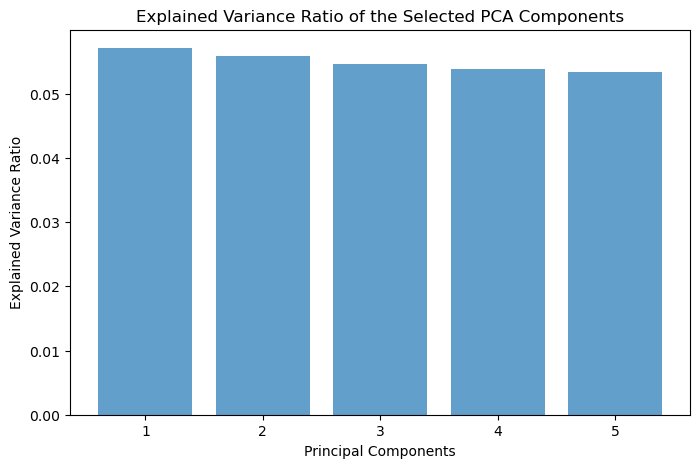

In [12]:
# Apply PCA to reduce dimensionality (keep 5 principal components)
pca = PCA(n_components=5)

# Fit and transform on the resampled and scaled training data (X_train_res)
X_train_pca = pca.fit_transform(X_train_res)

# Use the same PCA components to transform the test data (X_test)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio of the selected components
print(
    "\nExplained Variance Ratio of the Selected Components:",
    pca.explained_variance_ratio_,
)

# Plot the explained variance ratio for the selected components
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), pca.explained_variance_ratio_, alpha=0.7, align="center")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio of the Selected PCA Components")
plt.show()

5. Model Training and Evaluation


KNN - Cross-Validation F1 Score: 0.6959 ± 0.0096
Classification Report for KNN:
              precision    recall  f1-score   support

          No       0.79      0.55      0.65      1613
         Yes       0.17      0.40      0.24       387

    accuracy                           0.52      2000
   macro avg       0.48      0.47      0.45      2000
weighted avg       0.67      0.52      0.57      2000

Confusion Matrix for KNN:
[[890 723]
 [234 153]]


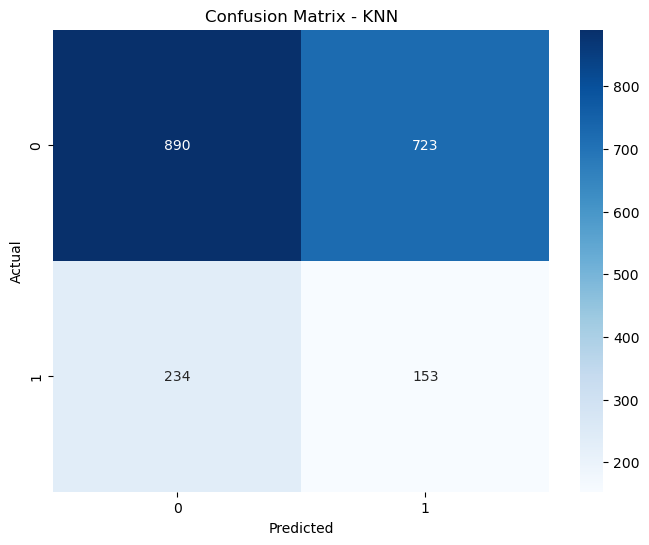


Naive Bayes - Cross-Validation F1 Score: 0.4994 ± 0.0155
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

          No       0.80      0.54      0.65      1613
         Yes       0.18      0.42      0.25       387

    accuracy                           0.52      2000
   macro avg       0.49      0.48      0.45      2000
weighted avg       0.68      0.52      0.57      2000

Confusion Matrix for Naive Bayes:
[[879 734]
 [225 162]]


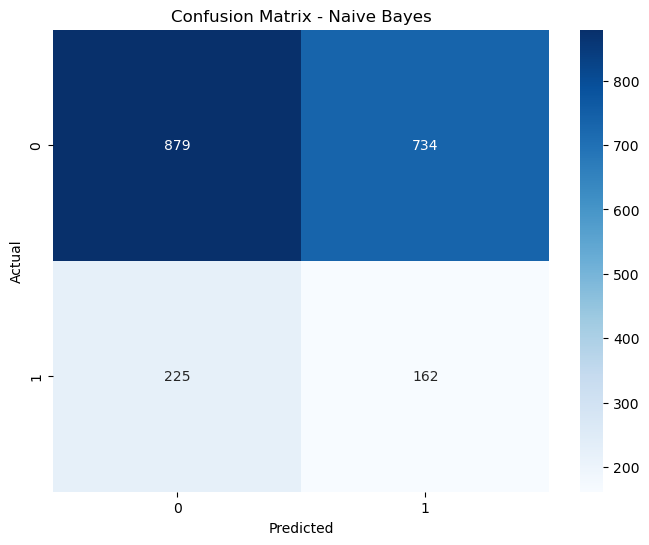


Logistic Regression - Cross-Validation F1 Score: 0.5120 ± 0.0109
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          No       0.81      0.51      0.63      1613
         Yes       0.20      0.51      0.29       387

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.46      2000
weighted avg       0.69      0.51      0.56      2000

Confusion Matrix for Logistic Regression:
[[820 793]
 [189 198]]


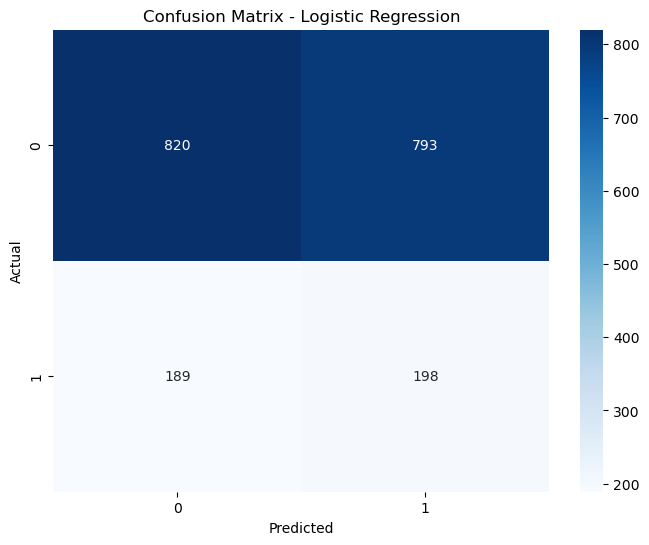


Decision Tree - Cross-Validation F1 Score: 0.6212 ± 0.0121
Classification Report for Decision Tree:
              precision    recall  f1-score   support

          No       0.82      0.63      0.71      1613
         Yes       0.21      0.42      0.28       387

    accuracy                           0.59      2000
   macro avg       0.51      0.52      0.50      2000
weighted avg       0.70      0.59      0.63      2000

Confusion Matrix for Decision Tree:
[[1013  600]
 [ 226  161]]


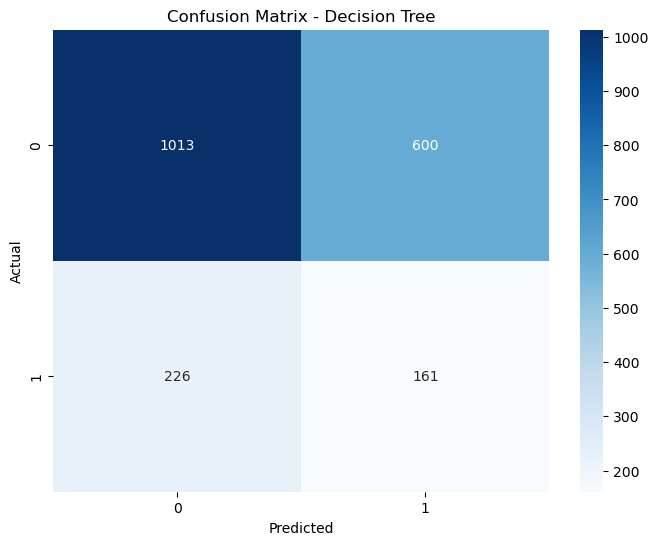


SVM - Cross-Validation F1 Score: 0.5422 ± 0.0077
Classification Report for SVM:
              precision    recall  f1-score   support

          No       0.80      0.65      0.72      1613
         Yes       0.18      0.31      0.23       387

    accuracy                           0.58      2000
   macro avg       0.49      0.48      0.47      2000
weighted avg       0.68      0.58      0.62      2000

Confusion Matrix for SVM:
[[1046  567]
 [ 266  121]]


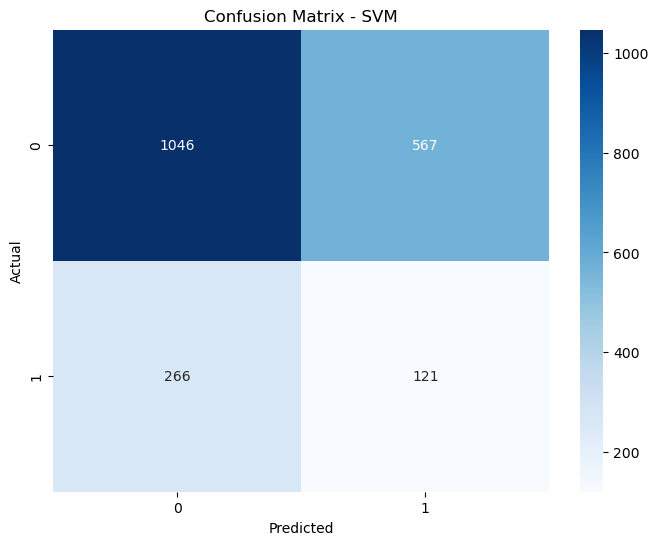


All models trained and evaluated.


In [13]:
# Define the models
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
}

# Train and evaluate models
for name, model in models.items():
    # Perform cross-validation and get the F1 score
    f1_scores = cross_val_score(model, X_train_pca, y_train_res, cv=5, scoring="f1")

    # Train the model on the full training data
    model.fit(X_train_pca, y_train_res)

    # Make predictions on the test data
    y_pred = model.predict(X_test_pca)

    # Print the F1 score (mean and standard deviation)
    print(
        f"\n{name} - Cross-Validation F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}"
    )

    # Print classification report and confusion matrix for the test data
    print(f"Classification Report for {name}:")
    print(
        classification_report(y_test, y_pred, target_names=["No", "Yes"])
    )  # Ensure correct target names

    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

print("\nAll models trained and evaluated.")

6. Cross-Validation Evaluation

In [17]:
# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_pca, y_train_res, cv=5, scoring="f1")
    print(f"{name} - Cross-validation F1-score (Mean): {cv_scores.mean():.4f}")
    print(
        f"{name} - Cross-validation F1-score (Standard Deviation): {cv_scores.std():.4f}\n"
    )

KNN - Cross-validation F1-score (Mean): 0.6959
KNN - Cross-validation F1-score (Standard Deviation): 0.0096

Naive Bayes - Cross-validation F1-score (Mean): 0.4994
Naive Bayes - Cross-validation F1-score (Standard Deviation): 0.0155

Logistic Regression - Cross-validation F1-score (Mean): 0.5120
Logistic Regression - Cross-validation F1-score (Standard Deviation): 0.0109

Decision Tree - Cross-validation F1-score (Mean): 0.6233
Decision Tree - Cross-validation F1-score (Standard Deviation): 0.0094

SVM - Cross-validation F1-score (Mean): 0.5422
SVM - Cross-validation F1-score (Standard Deviation): 0.0077



4. Illustrating and Analyzing Results

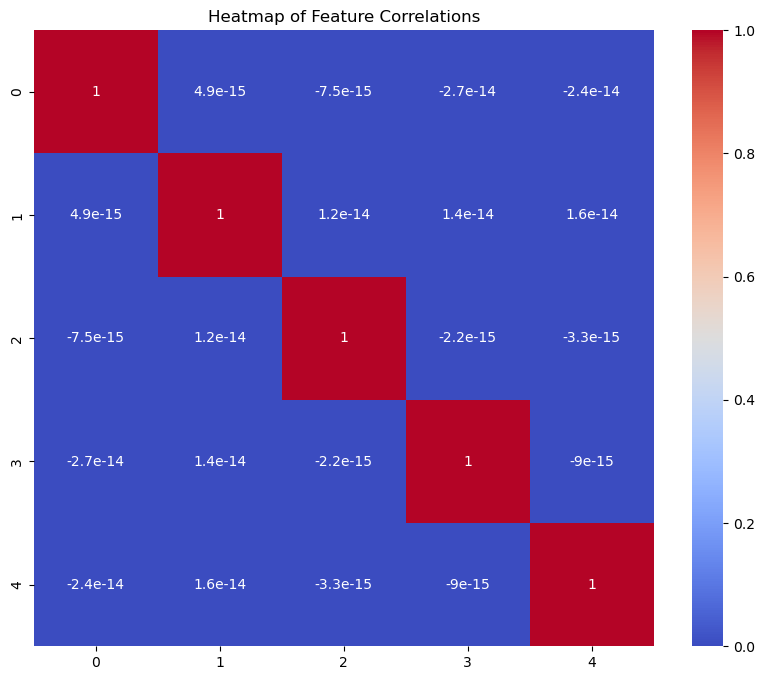

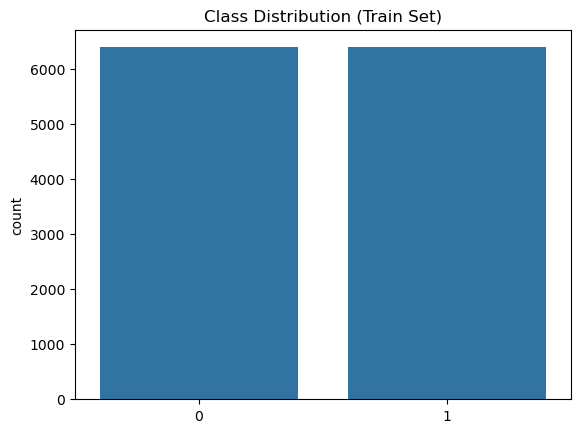

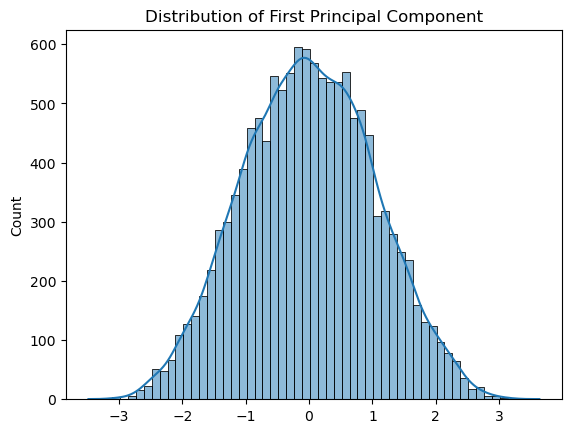

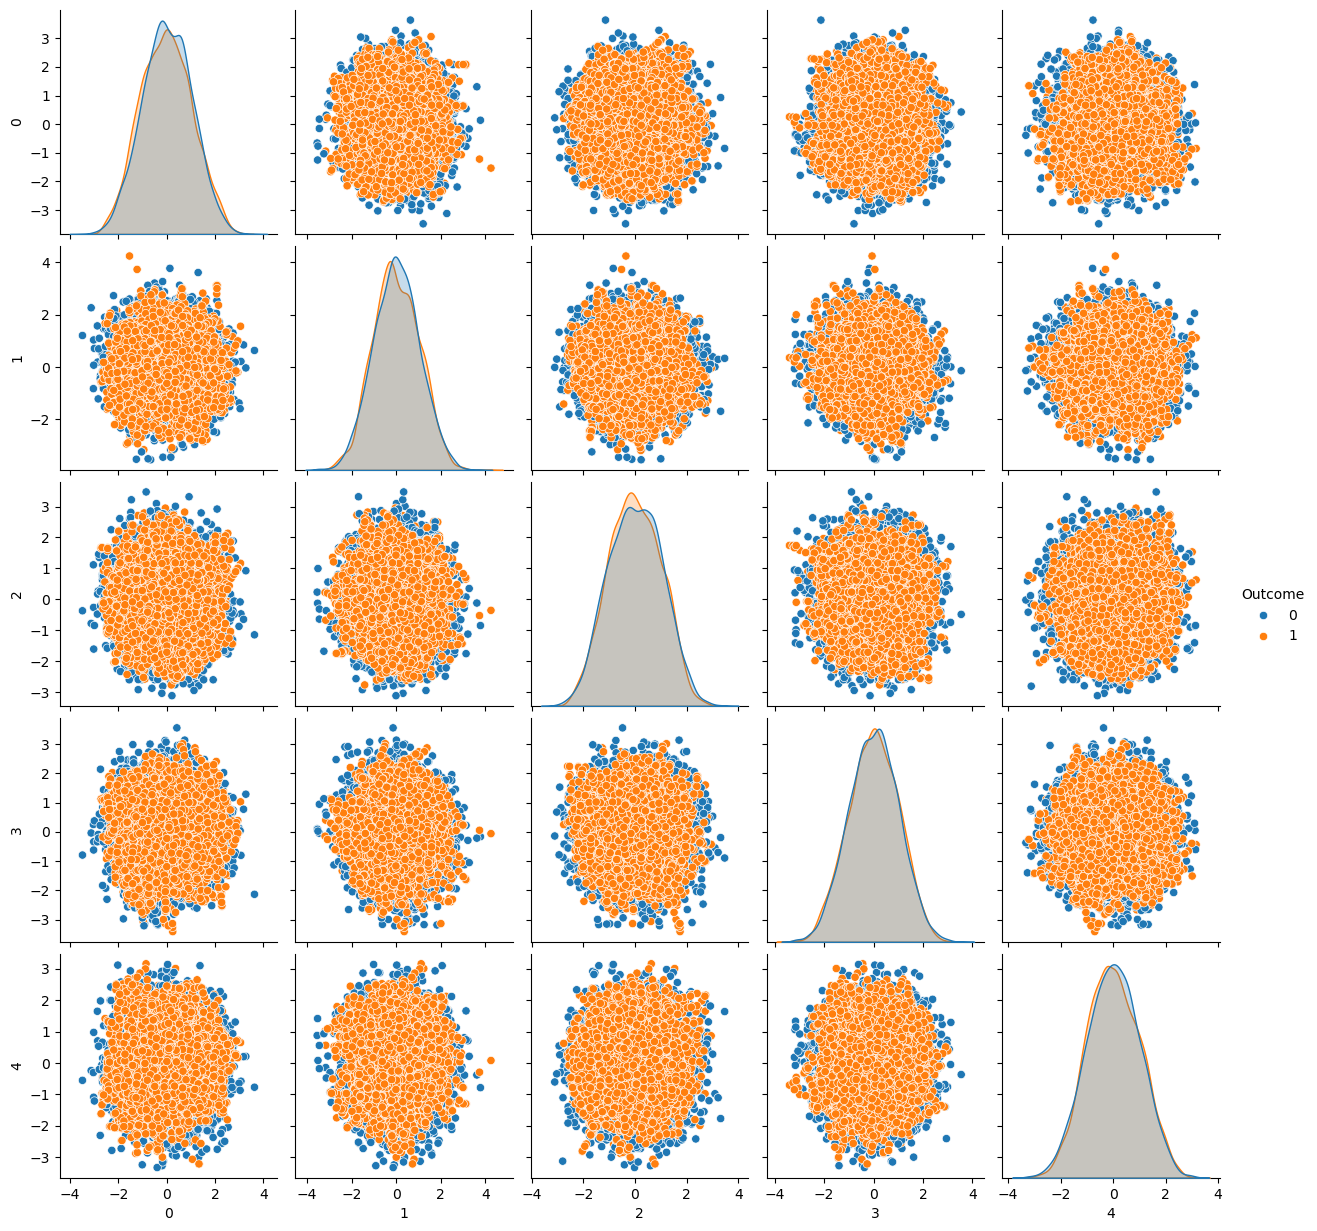

In [16]:
# 1. Heatmap of Feature Correlations
# Correlation matrix of PCA components
corr = pd.DataFrame(X_train_pca).corr()
plt.figure(figsize=(10, 8))
# Heatmap with correlations
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

# 2. Class Distribution Count Plot
# Count plot for the resampled target variable
sns.countplot(x=y_train_res)
plt.title("Class Distribution (Train Set)")
plt.show()

# 3. Histograms of Feature Distributions after PCA
# Histogram for the first principal component
sns.histplot(X_train_pca[:, 0], kde=True)
plt.title("Distribution of First Principal Component")
plt.show()

# 4. Pair Plot for Feature Relationships
# Convert y_train_res to a DataFrame and
# concatenate it with X_train_pca for the pairplot
y_train_df = pd.DataFrame(
    y_train_res, columns=["Outcome"]
)  # Target variable as DataFrame
X_train_pca_df = pd.DataFrame(X_train_pca)
pair_data = pd.concat(
    [X_train_pca_df, y_train_df], axis=1
)  # Concatenate the features with target

# Now you can use pairplot without issues
# Pair plot, with coloring by Outcome
sns.pairplot(pair_data, hue="Outcome")
plt.show()